In [23]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X

tensor([[0.1872, 0.1890, 0.1805,  ..., 0.1791, 0.1756, 0.1754],
        [0.1980, 0.1989, 0.1974,  ..., 0.1850, 0.1930, 0.1860],
        [0.2103, 0.2107, 0.2080,  ..., 0.1960, 0.2044, 0.2041],
        ...,
        [0.4694, 0.4644, 0.4707,  ..., 0.4877, 0.4774, 0.4771],
        [0.5260, 0.5163, 0.5141,  ..., 0.4935, 0.5005, 0.5110],
        [0.5704, 0.5643, 0.5629,  ..., 0.5024, 0.4991, 0.5269]],
       dtype=torch.float64)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=100, shuffle=True)

# Model setup

In [9]:
torch.cuda.is_available()

True

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
deepmodel = m.DeepDenseVAE_mark_III(original_dim=160, latent_dim=15, encoder_dims=[256, 128])
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-4),
        loss_function="GaussianNLL",
        verbose=True
        )

In [13]:
loss_hist = svi(epochs=200, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/200], average_loss:118.4538, validation_loss:65.1565
Epoch [2/200], average_loss:31.4484, validation_loss:2.9048
Epoch [3/200], average_loss:-14.3558, validation_loss:-29.8865
Epoch [4/200], average_loss:-43.3836, validation_loss:-53.5667
Epoch [5/200], average_loss:-61.1342, validation_loss:-69.6357
Epoch [6/200], average_loss:-74.4319, validation_loss:-78.6656
Epoch [7/200], average_loss:-85.1990, validation_loss:-88.6863
Epoch [8/200], average_loss:-93.4119, validation_loss:-95.2515
Epoch [9/200], average_loss:-99.7790, validation_loss:-100.2810
Epoch [10/200], average_loss:-104.8647, validation_loss:-106.3912
Epoch [11/200], average_loss:-109.5840, validation_loss:-109.6117
Epoch [12/200], average_loss:-113.8971, validation_loss:-113.0778
Epoch [13/200], average_loss:-117.2016, validation_loss:-116.8599
Epoch [14/200], average_loss:-120.8349, validation_loss:-120.2388
Epoch [15/200], average_loss:-123.7396, validation_loss:-123.8027
Epoch [16/200], average_loss:-126.6732, 

Epoch [126/200], average_loss:-203.3778, validation_loss:-198.6242
Epoch [127/200], average_loss:-204.1164, validation_loss:-200.4838
Epoch [128/200], average_loss:-204.4424, validation_loss:-198.5403
Epoch [129/200], average_loss:-203.9073, validation_loss:-199.6926
Epoch [130/200], average_loss:-204.6822, validation_loss:-200.3768
Epoch [131/200], average_loss:-203.9922, validation_loss:-199.0607
Epoch [132/200], average_loss:-204.7563, validation_loss:-201.1180
Epoch [133/200], average_loss:-204.4758, validation_loss:-200.3914
Epoch [134/200], average_loss:-204.7067, validation_loss:-201.1606
Epoch [135/200], average_loss:-205.0477, validation_loss:-197.9356
Epoch [136/200], average_loss:-204.6547, validation_loss:-199.8549
Epoch [137/200], average_loss:-204.5540, validation_loss:-200.8859
Epoch [138/200], average_loss:-205.2661, validation_loss:-200.7278
Epoch [139/200], average_loss:-204.8192, validation_loss:-201.6545
Epoch [140/200], average_loss:-205.1869, validation_loss:-198.

KeyboardInterrupt: 

In [27]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-206.9451, validation_loss:-202.6750
Epoch [2/50], average_loss:-206.5317, validation_loss:-200.8853
Epoch [3/50], average_loss:-206.7209, validation_loss:-200.8053
Epoch [4/50], average_loss:-206.6043, validation_loss:-196.5290
Epoch [5/50], average_loss:-206.4220, validation_loss:-201.6342
Epoch [6/50], average_loss:-207.0322, validation_loss:-202.5302
Epoch [7/50], average_loss:-206.9863, validation_loss:-202.9543
Epoch [8/50], average_loss:-206.7802, validation_loss:-202.2650
Epoch [9/50], average_loss:-206.8227, validation_loss:-202.8291
Epoch [10/50], average_loss:-206.9875, validation_loss:-202.9793
Epoch [11/50], average_loss:-207.8418, validation_loss:-201.6978
Epoch [12/50], average_loss:-206.7300, validation_loss:-199.0615
Epoch [13/50], average_loss:-207.4283, validation_loss:-201.1630
Epoch [14/50], average_loss:-207.5496, validation_loss:-203.6673
Epoch [15/50], average_loss:-207.7553, validation_loss:-203.1022
Epoch [16/50], average_loss:-207.9

In [37]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-211.8848, validation_loss:-204.7153
Epoch [2/50], average_loss:-212.3368, validation_loss:-205.7502
Epoch [3/50], average_loss:-212.2312, validation_loss:-206.2951
Epoch [4/50], average_loss:-212.2147, validation_loss:-206.6842
Epoch [5/50], average_loss:-212.2418, validation_loss:-207.3321
Epoch [6/50], average_loss:-212.4486, validation_loss:-205.9557
Epoch [7/50], average_loss:-212.3000, validation_loss:-206.8321
Epoch [8/50], average_loss:-212.4485, validation_loss:-207.7693
Epoch [9/50], average_loss:-212.6225, validation_loss:-206.8224
Epoch [10/50], average_loss:-212.4038, validation_loss:-205.8759
Epoch [11/50], average_loss:-212.4397, validation_loss:-206.3395
Epoch [12/50], average_loss:-212.8326, validation_loss:-207.8851
Epoch [13/50], average_loss:-212.8429, validation_loss:-207.5512
Epoch [14/50], average_loss:-212.1915, validation_loss:-207.6426
Epoch [15/50], average_loss:-213.1546, validation_loss:-207.2001
Epoch [16/50], average_loss:-213.0

In [46]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-214.7224, validation_loss:-208.5964
Epoch [2/50], average_loss:-214.9993, validation_loss:-209.7260
Epoch [3/50], average_loss:-214.8240, validation_loss:-209.1224
Epoch [4/50], average_loss:-214.4213, validation_loss:-210.5541
Epoch [5/50], average_loss:-215.5308, validation_loss:-209.3409
Epoch [6/50], average_loss:-214.6224, validation_loss:-209.9873
Epoch [7/50], average_loss:-215.2704, validation_loss:-208.9425
Epoch [8/50], average_loss:-215.5572, validation_loss:-208.1454
Epoch [9/50], average_loss:-215.2277, validation_loss:-209.8872
Epoch [10/50], average_loss:-214.5451, validation_loss:-210.0375
Epoch [11/50], average_loss:-215.6779, validation_loss:-210.7468
Epoch [12/50], average_loss:-215.6715, validation_loss:-208.7665
Epoch [13/50], average_loss:-215.1802, validation_loss:-207.1837
Epoch [14/50], average_loss:-215.4899, validation_loss:-209.3690
Epoch [15/50], average_loss:-215.9567, validation_loss:-209.3455
Epoch [16/50], average_loss:-215.5

In [54]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:-216.8446, validation_loss:-211.5350
Epoch [2/50], average_loss:-217.3636, validation_loss:-211.2084
Epoch [3/50], average_loss:-216.3235, validation_loss:-210.2483
Epoch [4/50], average_loss:-217.3444, validation_loss:-211.4648
Epoch [5/50], average_loss:-217.3521, validation_loss:-212.6994
Epoch [6/50], average_loss:-217.4821, validation_loss:-211.5879
Epoch [7/50], average_loss:-217.6436, validation_loss:-211.7398
Epoch [8/50], average_loss:-216.7722, validation_loss:-210.8604
Epoch [9/50], average_loss:-217.6343, validation_loss:-212.0401
Epoch [10/50], average_loss:-217.5423, validation_loss:-211.3592
Epoch [11/50], average_loss:-217.1040, validation_loss:-211.3288
Epoch [12/50], average_loss:-217.4492, validation_loss:-211.8402
Epoch [13/50], average_loss:-217.1708, validation_loss:-211.9749
Epoch [14/50], average_loss:-217.5970, validation_loss:-210.0221
Epoch [15/50], average_loss:-217.2565, validation_loss:-212.0892
Epoch [16/50], average_loss:-217.5

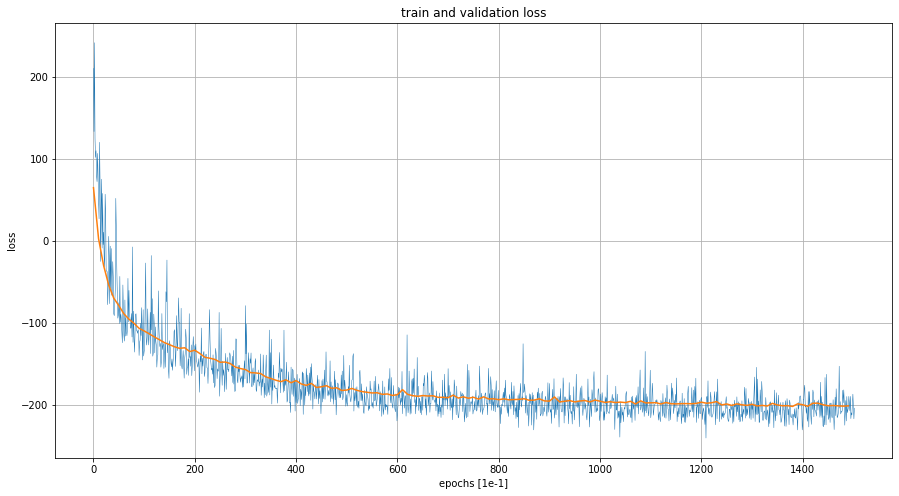

In [14]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"]))*10, svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs [1e-1]") # 1 epoch = 10 points on x axis
plt.ylabel("loss")
plt.show()

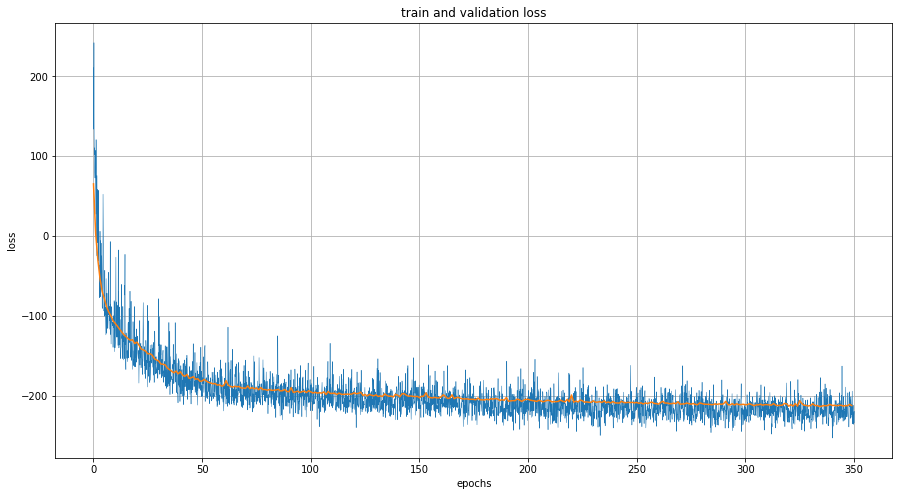

In [55]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis/10, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"])), svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs") # 1 epoch = 10 points on x axis
plt.ylabel("loss")
plt.show()

In [57]:
#torch.save(svi.model, "VAE_saves_and_logs/DeepDenseVAE_mark_III_[160-256-128-15]_VDO_GNLL_350ep_lr-1e-4.pt")
#torch.save(svi.optimizer, "VAE_saves_and_logs/DeepDenseVAE_mark_III_[160-256-128-15]__VDO_GNLL_350ep_lr-1e-4_optimizer.pt")
#dd.save("VAE_saves_and_logs/DeepDenseVAE_mark_III_[160-256-128-15]_VDO_GNLL_350ep_lr-1e-4_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


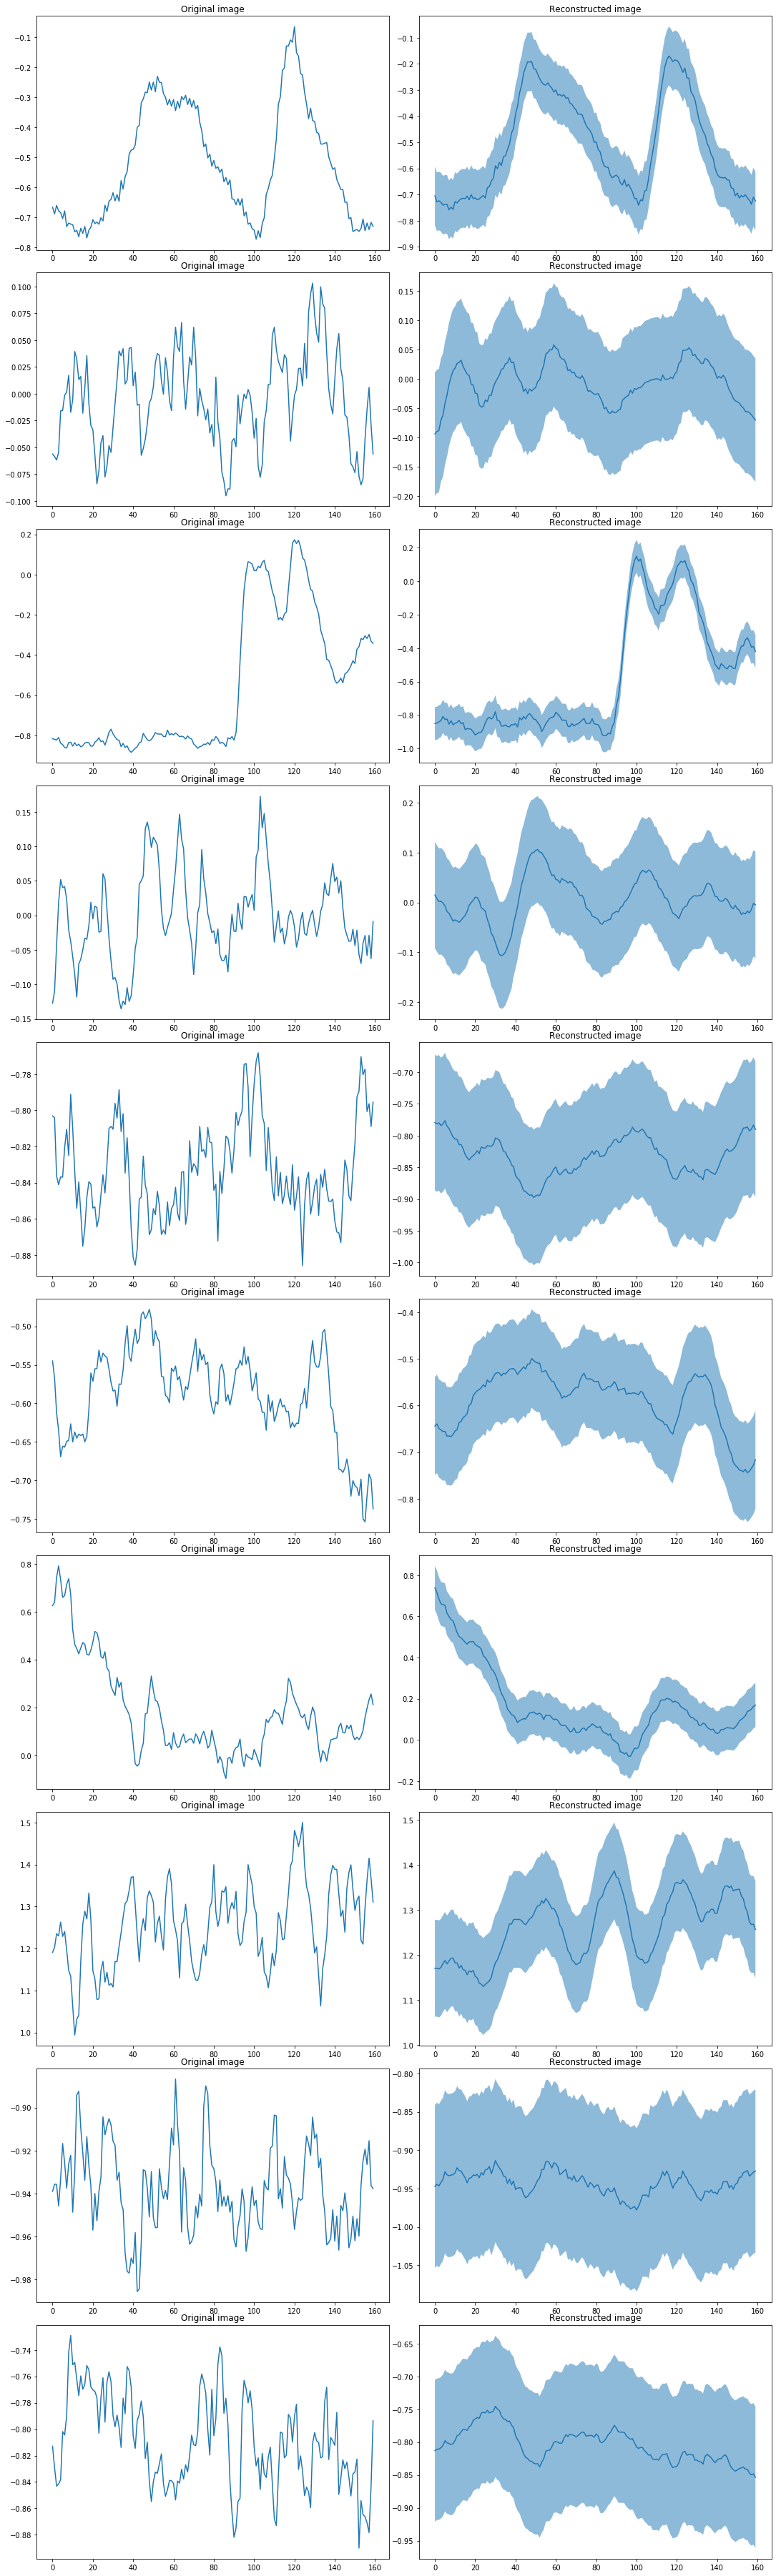

In [18]:
# epoch 200
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


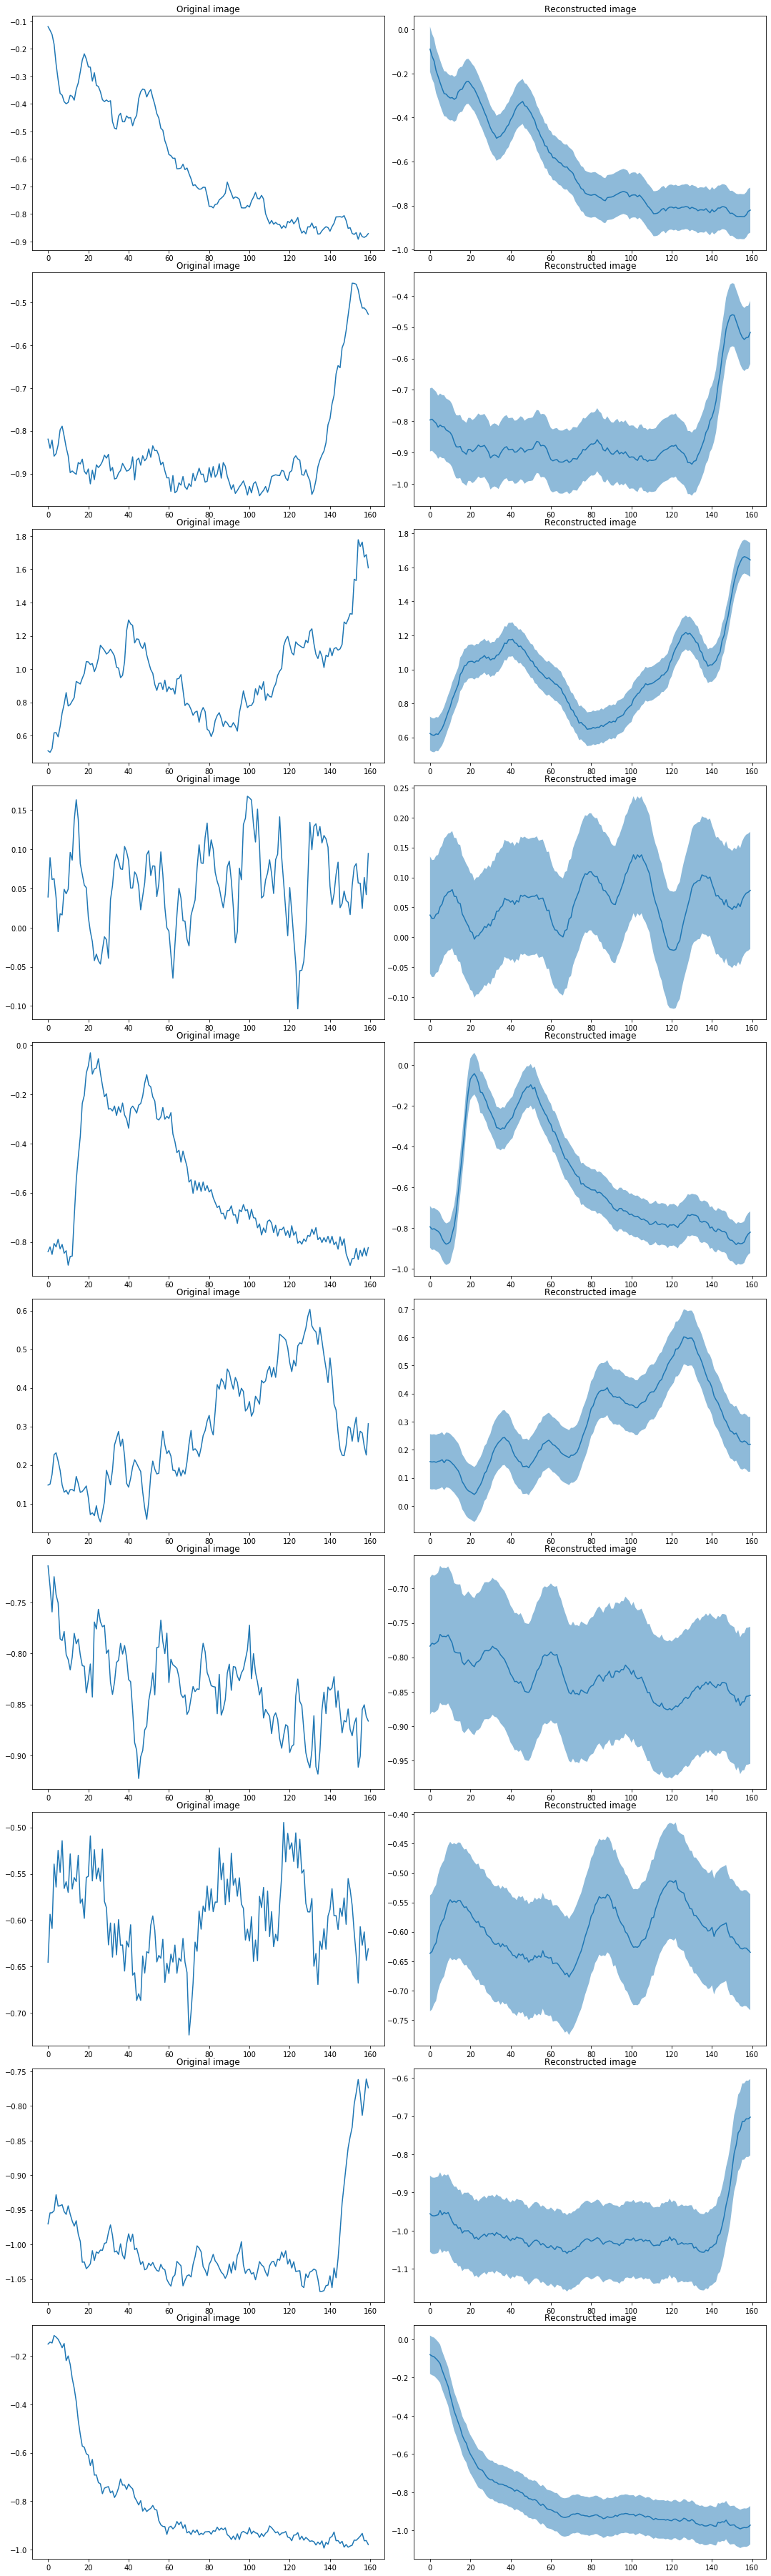

In [49]:
# epoch 300
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = mod(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


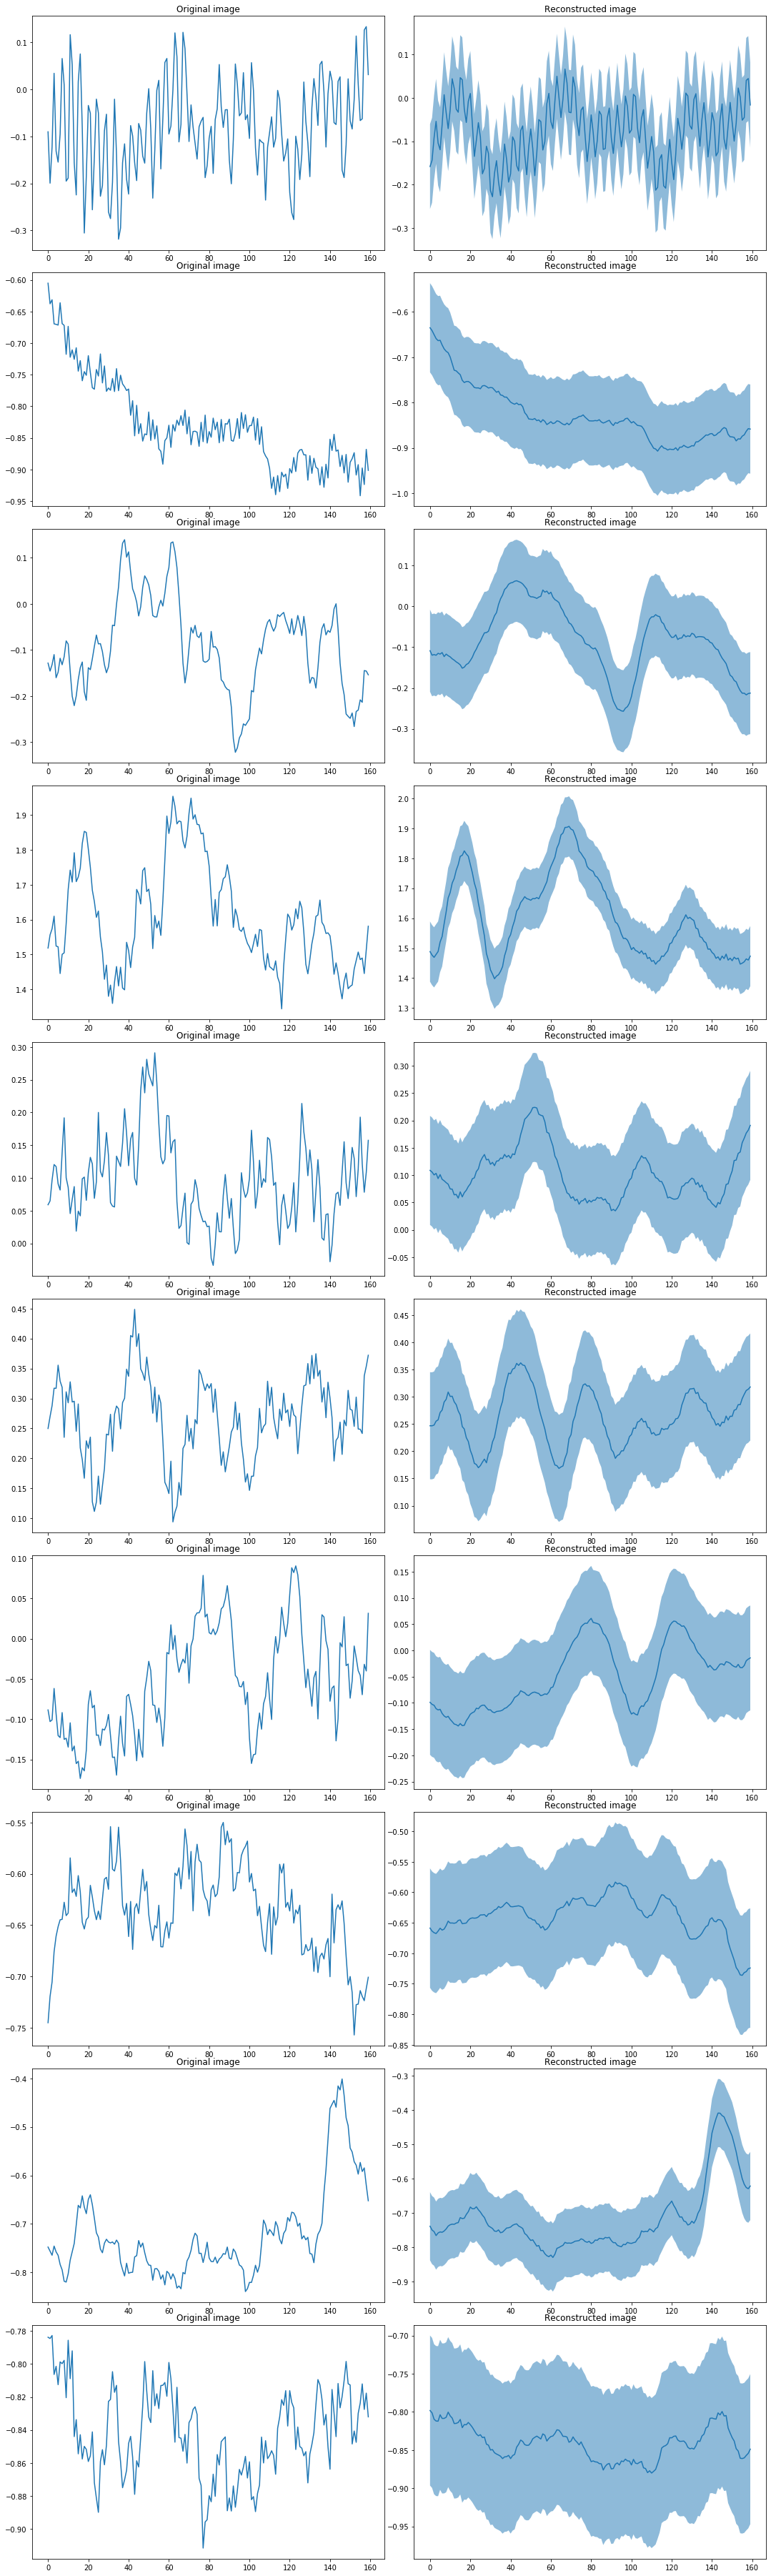

In [41]:
# epoch 250
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

cuda:0


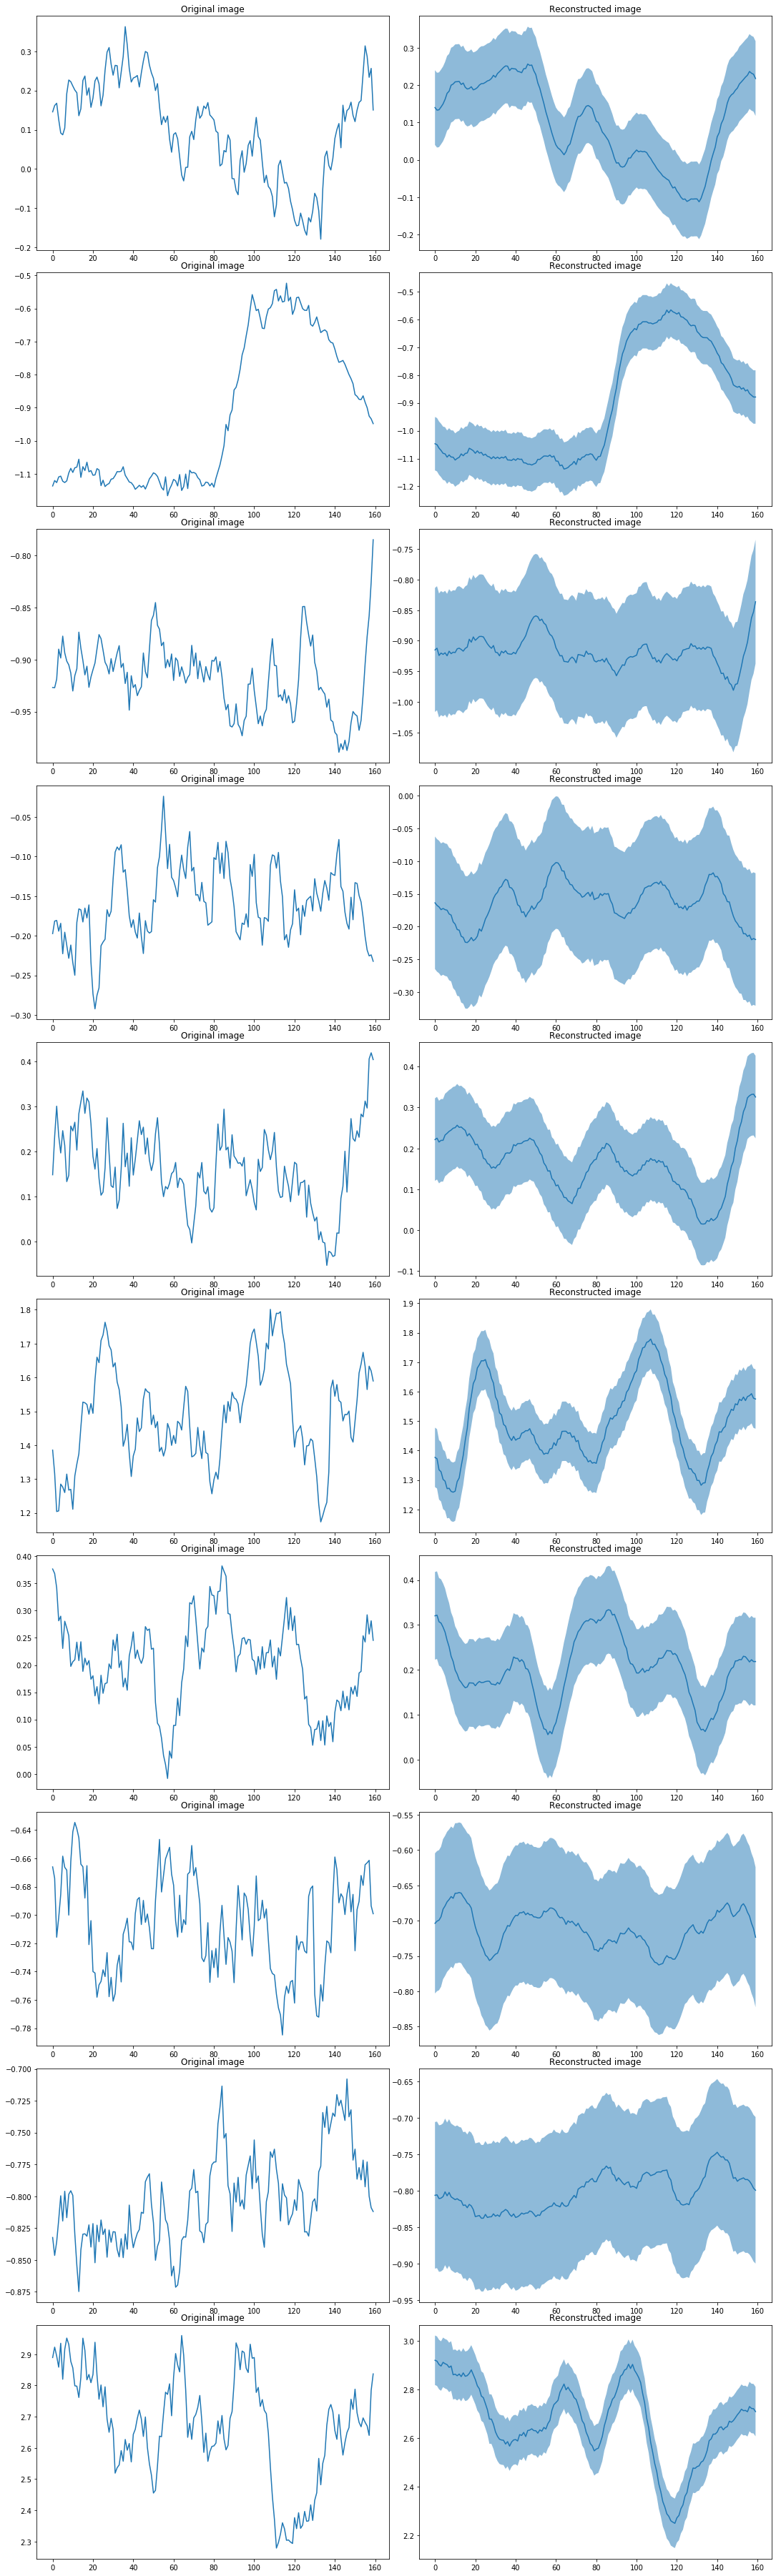

In [58]:
#epoch 350
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = mod(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [59]:
mod = torch.load("VAE_saves_and_logs/DeepDenseVAE_mark_III_[160-256-128-15]_VDO_GNLL_350ep_lr-1e-4.pt")

In [60]:
mod.eval()

DeepDenseVAE_mark_III(
  (encoder): Sequential(
    (0): Flatten()
    (1): Linear(in_features=160, out_features=256, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=256, out_features=128, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): VariationalLayer(
      (mu): Linear(in_features=128, out_features=15, bias=True)
      (rho): Linear(in_features=128, out_features=15, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
  (decoder): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=128, out_features=256, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): VariationalDecoderOutput(
      (mu): Linear(in_features=256, out_features=160, bias=True)
      (rho): Linear(in_features=256, out_features=1, bias=True)
      (softplus): Softplus(beta=1, threshold=20)
    )
  )
)

In [61]:
z, mu, sigma = mod.encoder(X.to(device))

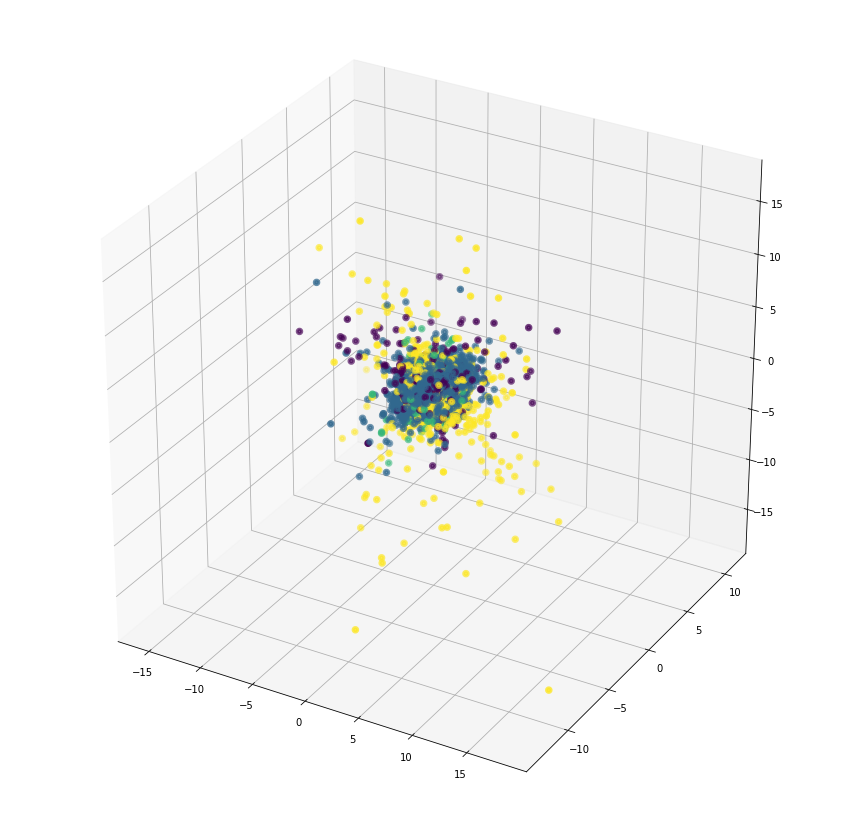

In [62]:
# epoch 350
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

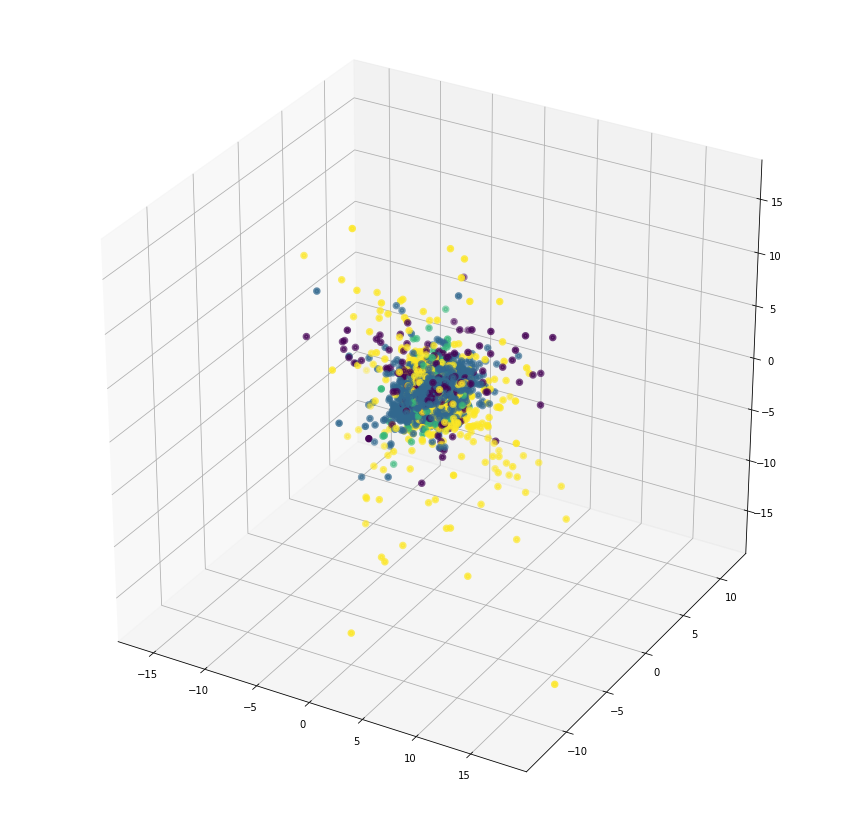

In [53]:
# epoch 300
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

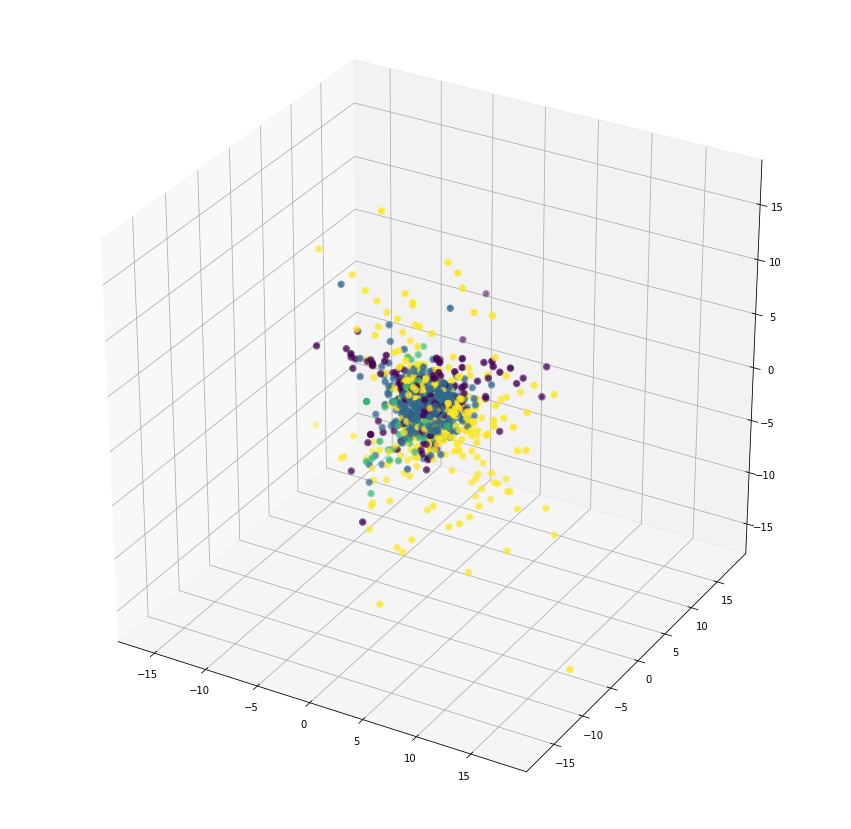

In [36]:
#epoch 200
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

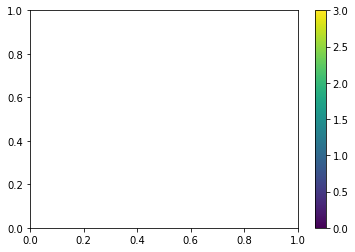

In [26]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [45]:
test.y

tensor([1., 1., 1.,  ..., 3., 1., 0.])